In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [22]:
main_path = '/Users/jeppegrejspetersen/Code/Final_project_AppML/'

In [23]:
t2m = xr.open_dataset(main_path + '/era5/' + '/era5_1940_temperature_2m.nc')
geo = xr.open_dataset(main_path + '/era5/' + '/era5_1940_geo500hpa.nc')
mslp = xr.open_dataset(main_path + '/era5/' +'/era5_1940_mean_sea_level_pressure.nc')
t850 = xr.open_dataset(main_path + '/era5/' + '/era5_1940_temperature_850hPa.nc')
prec = xr.open_dataset(main_path + '/era5/' + '/era5_1940_total_precipitation.nc')


In [14]:
t850

<xarray.Dataset> Size: 508MB
Dimensions:         (valid_time: 366, pressure_level: 1, latitude: 241,
                     longitude: 1440)
Coordinates:
    number          int64 8B ...
  * pressure_level  (pressure_level) float64 8B 850.0
  * latitude        (latitude) float64 2kB 90.0 89.75 89.5 ... 30.5 30.25 30.0
  * longitude       (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
  * valid_time      (valid_time) datetime64[ns] 3kB 1940-01-01 ... 1940-12-31
Data variables:
    t               (valid_time, pressure_level, latitude, longitude) float32 508MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-16T12:19 GRIB to CDM+CF via cfgrib-0.9.1...

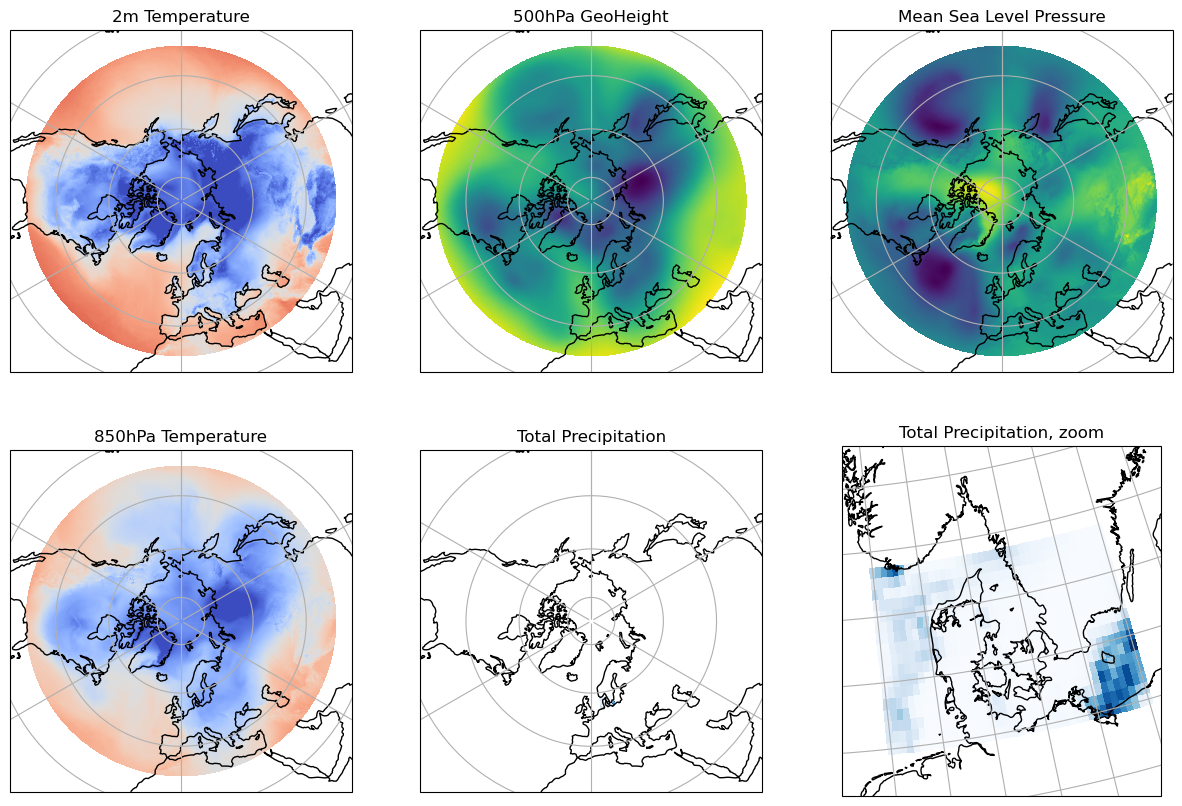

In [18]:
fig, axs = plt.subplots(ncols=3,nrows=2, figsize=(15, 10), subplot_kw={'projection': ccrs.NorthPolarStereo()})

for ax in axs.flatten():
    ax.coastlines()
    # ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.gridlines()

    ax.set_extent([-180, 180, 25, 90], ccrs.PlateCarree())

# Plotting the data
axs[0, 0].set_title('2m Temperature')
axs[0, 0].pcolormesh(t2m.longitude, t2m.latitude, t2m.t2m[0], transform=ccrs.PlateCarree(), cmap='coolwarm', shading='auto', vmin = 273-30, vmax = 273+30)

axs[0, 1].set_title('500hPa GeoHeight')
axs[0, 1].pcolormesh(geo.longitude, geo.latitude, geo.z.isel(pressure_level = 0)[0], transform=ccrs.PlateCarree(), cmap='viridis', shading='auto')
axs[0, 2].set_title('Mean Sea Level Pressure')
axs[0, 2].pcolormesh(mslp.longitude, mslp.latitude, mslp.msl[0], transform=ccrs.PlateCarree(), cmap='viridis', shading='auto')
axs[1, 0].set_title('850hPa Temperature')
axs[1, 0].pcolormesh(t850.longitude, t850.latitude, t850.t.isel(pressure_level = 0)[0], transform=ccrs.PlateCarree(), cmap='coolwarm', shading='auto',vmin = 273-30, vmax = 273+30)
axs[1, 1].set_title('Total Precipitation')
axs[1, 1].pcolormesh(prec.longitude, prec.latitude, prec.tp[0], transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

axs[1, 2].set_title('Total Precipitation, zoom')
axs[1, 2].set_extent([5, 16, 53, 60], ccrs.PlateCarree())
axs[1, 2].pcolormesh(prec.longitude, prec.latitude, prec.tp[0], transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')